#### Tugas 1 - Machine Learning

#### Kelompok 9

#### Anggota Kelompok:
1. **2208107010012** Fazhira Rizky Harmayani
2. **2208107010027** Cut Dahliana
3. **2208107010043** Naufal Aqil
4. **2208107010063** Hidayat Nur Hakim
5. **2208107010086** Riska Haqika Situmorang

#### Deskripsi Tugas
Tugas ini merupakan tugas pertama dalam mata kuliah Machine Learning. Setiap kelompok bekerja dengan dataset dari sumber open source seperti Kaggle atau Hugging Face. Tujuan utama tugas ini adalah memahami proses persiapan data sebelum digunakan dalam analisis atau pelatihan model machine learning.

Kelompok 9 memilih dataset dari Kaggle yang dapat diakses melalui link berikut: [PRSA Data Aotizhongxin (2013-2017)](https://www.kaggle.com/datasets/shaviranurfadhilla/prsa-data-aotizhongxin-2013-2017).

**Kelompok 9 - Machine Learning 2025**

####  Import Libary

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#### Tahap Preprocessing Data

##### Mengekstrak dan Membaca Data

In [4]:
# Memuat dataset
df = pd.read_csv("./data/PRSA_Data_Aotizhongxin.csv")

Proses mengekstrak dan membaca data akan dilakukan dengan menggunakan library pandas. Data yang akan digunakan adalah data berjenis csv. Kode diatas adalah syntax untuk memanggil data dari file berjenis csv.

#####  Menampilkan Informasi Dataset &  Mengecek Missing Value

In [5]:
# Menampilkan informasi dasar dataset
print(df.info())

# Mengecek jumlah nilai kosong
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
No            0
year          0
month         0
day           0

Penjelasan <br>
Code di atas untuk mengecek informasi dataset dan juga mengecek missing values dapat dilihat berdasarkan ouput itu bahwa dataset 35.064 & 16 kolom. Pada Dataset ini terdapat beberapa missing values terutama pada kolom polutan udara (PM2.5, PM10, SO2, NO2, CO, O3) Beberapa kolom memeiliki jumlah missing values yang realtif kecil seperti wd dan WSPM

#####  Menangani Missing Value

In [ ]:
# Kolom dengan missing values kecil (<100) diimputasi (mengisi)
# Mengisi kolom kategori dengan mode tanpa inplace untuk menghindari FutureWarning
df['wd'] = df['wd'].fillna(df['wd'].mode()[0])
# Mengisi kolom numerik dengan median tanpa inplace
df['WSPM'] = df['WSPM'].fillna(df['WSPM'].median())


# Disarankan untuk diimputasi dengan median atau interpolasi, karena data polutan udara biasanya memiliki outlier. 
# Mengisi kolom dengan missing values sedang menggunakan median
cols_with_median = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']
df[cols_with_median] = df[cols_with_median].apply(lambda x: x.fillna(x.median()))

# Mengecek kembali jumlah missing values setelah imputasi
print("Missing values setelah penanganan:")
print(df.isnull().sum())

Missing values setelah penanganan:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Penjelasan Bagaimana Menangani Missing Value<br>

Kategori Missing Values:<br>
- Jumlah kecil (< 100) → wd (81), WSPM (14)<br>
- Jumlah sedang (100 - 2000) → PM2.5 (925), PM10 (718), SO2 (935), NO2 (1023), O3 (1719)<br>
- Jumlah besar (> 2000) → CO (1776)<br>

Jika missing values kecil (<1% dari total data), imputasi lebih disarankan. Jika banyak (>5-10%), perlu dipertimbangkan apakah dihapus atau diimputasi.<br>

Metode Pengisian Missing Values:<br>
1. Mode untuk Data Kategorikal<br>
   - Kolom wd (arah angin) → diisi dengan mode (nilai paling sering muncul) agar tetap konsisten.<br>
2. Median untuk Data Numerik<br>
   - Kolom WSPM (kecepatan angin) → diisi dengan median, lebih tahan terhadap outlier.<br>
   - Kolom PM2.5, PM10, SO2, dll. → diisi dengan median agar lebih stabil.<br>

Kenapa Kolom CO Tidak Dihapus?<br>
1. Kehilangan Data Jika Dihapus<br>
   - Missing values CO = 17,76% (1.776 dari 35.064 baris).<br>
   - Jika dihapus, informasi dari kolom lain juga akan hilang.<br>
   - Solusi: Lebih baik diimputasi daripada dihapus.<br>
2. Kenapa Menggunakan Median?<br>
   - Alternatif imputasi:<br>
     - Mean (Rata-rata) → Tidak cocok karena rentan terhadap outlier.<br>
     - Median (Nilai Tengah) → Lebih robust dan stabil.<br>
   - Kesimpulan: Median lebih cocok untuk CO dibandingkan mean.<br>
3. Kapan Kolom Sebaiknya Dihapus?<br>
   - Jika missing values > 40-50%, kolom lebih baik dihapus.<br>
   - Jika hanya 17,76%, masih layak diimputasi.<br>

Kesimpulan Akhir:<br>
- Mode untuk wd agar tetap konsisten.<br>
- Median untuk WSPM, CO, dll. agar lebih tahan terhadap outlier.<br>
- Kolom CO tidak dihapus karena masih memiliki 82% data.<br>
- Jika missing values > 50%, baru dipertimbangkan untuk dihapus.<br>
#####  Mengecek Data Duplikat

In [15]:
df.duplicated().sum()

0

Penjelasan <br>
Dapat dilihat untuk dataset tersebut tidak terdapat data duplikat

#####  Normalisasi Data

In [9]:
# Inisialisasi scaler untuk masing-masing dataset
scaler = MinMaxScaler()

# Daftar kolom numerik yang akan dinormalisasi
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Normalisasi dataset train (fit dan transform di train)
df[num_cols] = scaler.fit_transform(df[num_cols])

Penjelasan <br>
Normalisasi diperlukan karena dataset memiliki variabel dengan skala berbeda (misalnya, konsentrasi polutan dalam µg/m³, suhu dalam °C, dan tekanan dalam hPa), yang dapat menyebabkan algoritma machine learning lebih condong ke fitur dengan nilai besar. Selain itu, normalisasi meningkatkan performa model dengan memastikan semua fitur berada dalam rentang yang sama, mempercepat konvergensi, dan menghindari bias dalam algoritma berbasis jarak seperti KNN dan SVM.

#####  Mendektesi Outlier

In [ ]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers(df, num_cols):
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menampilkan outlier
    outliers = df[((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]
    return outliers

# Menampilkan outlier pada train dataset
outliers_train = detect_outliers(df, num_cols)
print(f"Jumlah outlier di dataset: {len(outliers_train)}")
display(outliers_train)


Jumlah outlier di dataset: 9588


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0.000000,0.0,0.181818,0.000000,0.000000,0.001117,0.002037,0.010902,0.017361,0.020202,0.181619,0.280977,0.661319,0.258621,0.000000,NNW,0.392857,Aotizhongxin
1,0.000029,0.0,0.181818,0.000000,0.043478,0.005587,0.006110,0.010902,0.017361,0.020202,0.181619,0.273997,0.664884,0.268025,0.000000,N,0.419643,Aotizhongxin
2,0.000057,0.0,0.181818,0.000000,0.086957,0.004469,0.005092,0.013837,0.027778,0.020202,0.172158,0.273997,0.670232,0.268025,0.000000,NNW,0.500000,Aotizhongxin
12,0.000342,0.0,0.181818,0.000000,0.521739,0.000000,0.004073,0.019707,0.038194,0.020202,0.174523,0.361257,0.737968,0.244514,0.000000,NNW,0.455357,Aotizhongxin
13,0.000371,0.0,0.181818,0.000000,0.565217,0.000000,0.004073,0.019707,0.034722,0.030303,0.179253,0.385689,0.718360,0.250784,0.000000,NW,0.383929,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34891,0.995095,1.0,0.090909,0.666667,0.826087,0.031285,0.039715,0.005032,0.159722,0.050505,0.113026,0.249564,0.654189,0.482759,0.005517,ESE,0.125000,Aotizhongxin
34892,0.995123,1.0,0.090909,0.666667,0.869565,0.049162,0.050916,0.005032,0.166667,0.070707,0.089373,0.247818,0.654189,0.485893,0.006897,SE,0.133929,Aotizhongxin
34893,0.995152,1.0,0.090909,0.666667,0.913043,0.071508,0.066191,0.005032,0.190972,0.000000,0.049164,0.249564,0.648841,0.489028,0.011034,S,0.098214,Aotizhongxin
34894,0.995180,1.0,0.090909,0.666667,0.956522,0.063687,0.059063,0.005032,0.156250,0.080808,0.075182,0.253054,0.641711,0.485893,0.005517,SSW,0.151786,Aotizhongxin


#####  Visualisasi Outlier

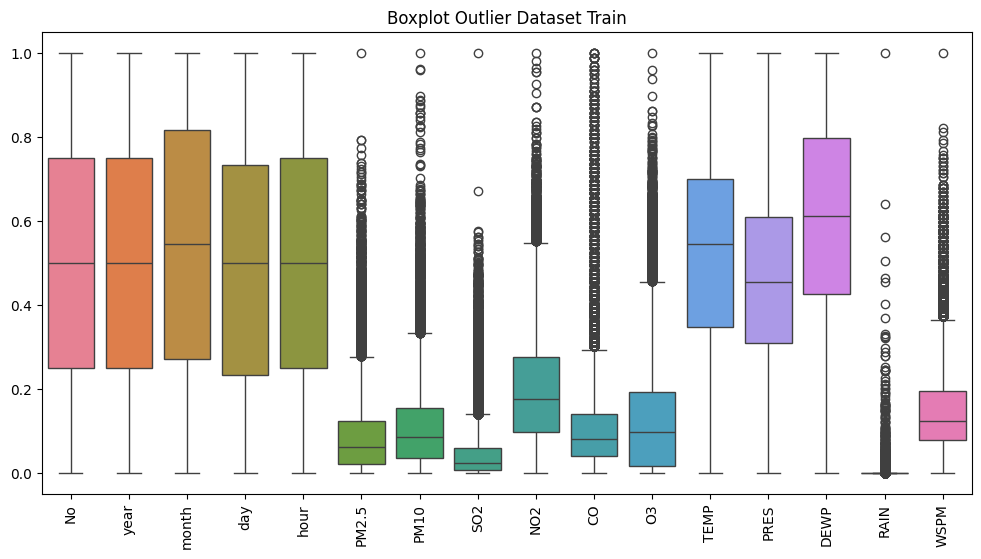

In [18]:
# Plot boxplot untuk dataset 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)  # Memutar label sumbu x agar lebih mudah dibaca
plt.title("Boxplot Outlier Dataset Train")
plt.show()

In [19]:
df.describe(include="number")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,0.500000,0.415640,0.502085,0.490988,0.500000,0.089133,0.110041,0.050160,0.198979,0.117469,0.132784,0.530272,0.462512,0.602242,0.000930,0.152544
std,0.288687,0.294303,0.313523,0.293341,0.300969,0.091772,0.096968,0.066986,0.128876,0.123377,0.136987,0.198937,0.185455,0.214559,0.012552,0.107506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.272727,0.233333,0.250000,0.021229,0.036660,0.007967,0.097222,0.040404,0.018415,0.347295,0.310160,0.426332,0.000000,0.080357
50%,0.500000,0.500000,0.545455,0.500000,0.500000,0.061453,0.086558,0.025577,0.177083,0.080808,0.098834,0.546248,0.454545,0.612853,0.000000,0.125000
75%,0.750000,0.750000,0.818182,0.733333,0.750000,0.124022,0.155804,0.060797,0.277778,0.141414,0.193445,0.699825,0.609626,0.797806,0.000000,0.196429
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#####  Meanangani Outlier

In [ ]:
# Fungsi untuk menangani outlier dengan metode capping (mengganti dengan batas bawah atau atas)
def handle_outliers(df, num_cols):
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier di bawah batas bawah dengan lower_bound, dan di atas batas atas dengan upper_bound
    df[num_cols] = df[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

    return df

# Terapkan pada dataset train
train_df_cleaned = handle_outliers(df, num_cols)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  float64
 1   year     35064 non-null  float64
 2   month    35064 non-null  float64
 3   day      35064 non-null  float64
 4   hour     35064 non-null  float64
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(16), object(2)
memory usage: 4.8+ MB


#####  Analis Korelasi Fitur

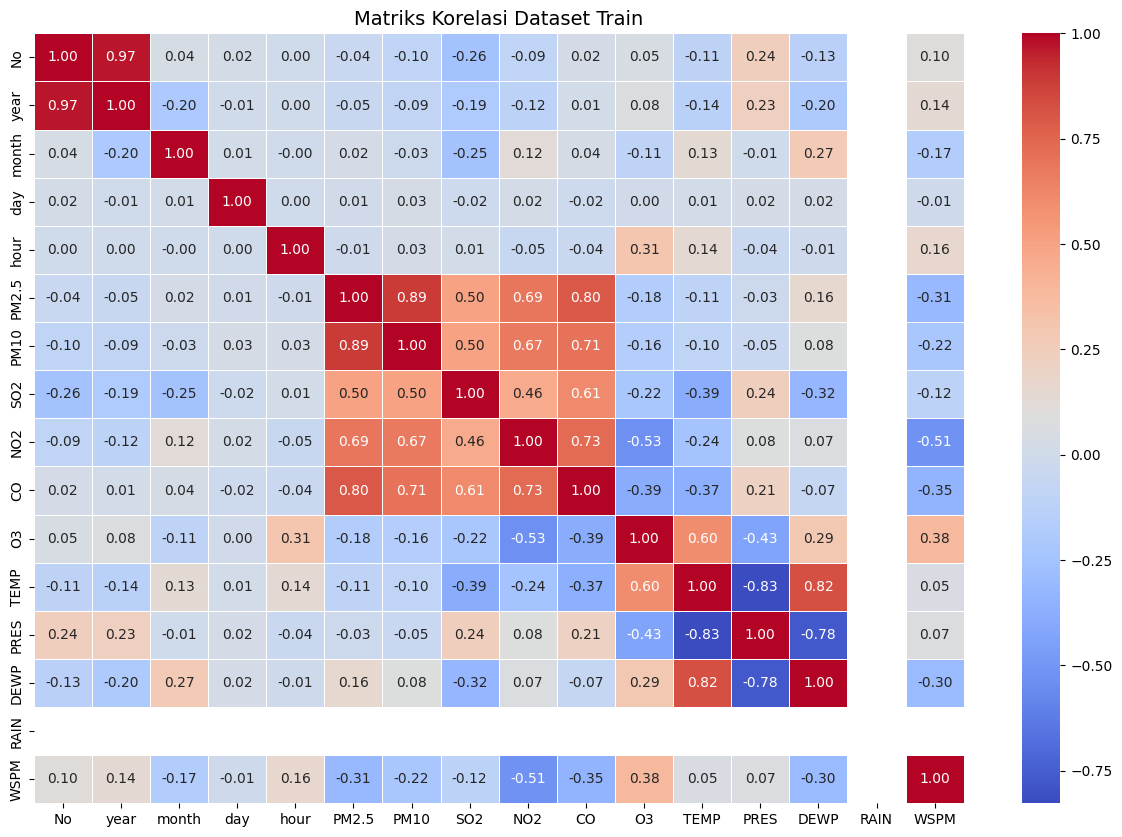

In [ ]:
# Memilih hanya kolom numerik (mengecualikan datetime)
numerical_columns = train_df_cleaned.select_dtypes(include=["number"])

# Menghitung korelasi antar kolom numerik
correlation_matrix = numerical_columns.corr()

# Membuat heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Menampilkan judul
plt.title("Matriks Korelasi Dataset Train", fontsize=14)
plt.show()
